In [ ]:
import pandas as pd

data = pd.read_csv(r"/content/train_dataset.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
import pandas as pd

# Load your dataset into a DataFrame (df)
df = pd.read_csv("/content/train_dataset.csv")

# List of columns to drop
columns_to_drop = ['Loan_Status']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the modified DataFrame
print(df)




      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           0      Graduate            No   
1    LP001003    Male     Yes           1      Graduate            No   
2    LP001005    Male     Yes           0      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           0      Graduate            No   
610  LP002979    Male     Yes           3      Graduate            No   
611  LP002983    Male     Yes           1      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.41216

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load your datasets into DataFrames (train_df and test_df)
train_df = pd.read_csv(r"/content/train_dataset.csv")
test_df = pd.read_csv(r"/content/test_dataset.csv")

# Select features and target variable
features = ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
target = 'LoanAmount'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Experiment with different degrees
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Perform linear regression modeling with polynomial features
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)
y_pred_linreg = linreg.predict(X_test_poly)

mse_linreg = mean_squared_error(y_test, y_pred_linreg)
acc_linreg = linreg.score(X_test_poly, y_test)

print("Linear Regression Model Mean Squared Error:", mse_linreg)
print("Linear Regression Model Accuracy: {:.2f}%".format(acc_linreg * 100))


Linear Regression Model Mean Squared Error: 2785.3345705277284
Linear Regression Model Accuracy: 24.81%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your datasets into DataFrames (train_df and test_df)
train_df = pd.read_csv(r"/content/train_dataset.csv")
test_df = pd.read_csv(r"/content/test_dataset.csv")

# Select features and target variable
features = ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
target = 'LoanAmount'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter tuning with Random Forest Regressor
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5]}
rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best model from the grid search
best_rfr = grid_search.best_estimator_

# Make predictions on the test data
y_pred_rfr = best_rfr.predict(X_test_poly)

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regressor Mean Squared Error:", mse_rfr)
print("Random Forest Regressor R-squared:", r2_rfr)


Random Forest Regressor Mean Squared Error: 2542.3418157710935
Random Forest Regressor R-squared: 0.31367797298002464


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your datasets into DataFrames (train_df and test_df)
train_df = pd.read_csv(r"/content/train_dataset.csv")
test_df = pd.read_csv(r"/content/test_dataset.csv")

# Select features and target variable
features = ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
target = 'LoanAmount'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter tuning with Support Vector Machine Regressor
param_grid = {'C': [0.1, 1, 10],
              'epsilon': [0.01, 0.1, 0.2]}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best model from the grid search
best_svr = grid_search.best_estimator_

# Make predictions on the test data
y_pred_svr = best_svr.predict(X_test_poly)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Machine Regressor Mean Squared Error:", mse_svr)
print("Support Vector Machine Regressor R-squared:", r2_svr)


Support Vector Machine Regressor Mean Squared Error: 2738.00050516274
Support Vector Machine Regressor R-squared: 0.26085861270583666


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your datasets into DataFrames (train_df and test_df)
train_df = pd.read_csv(r"/content/train_dataset.csv")
test_df = pd.read_csv(r"/content/test_dataset.csv")

# Select features and target variable
features = ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
target = 'LoanAmount'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter tuning with Gradient Boosting Regressor
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5]}
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

# Get the best model from the grid search
best_gbr = grid_search.best_estimator_

# Make predictions on the test data
y_pred_gbr = best_gbr.predict(X_test_poly)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Mean Squared Error:", mse_gbr)
print("Gradient Boosting Regressor R-squared:", r2_gbr)


Gradient Boosting Regressor Mean Squared Error: 2377.150819497826
Gradient Boosting Regressor R-squared: 0.3582723775185551


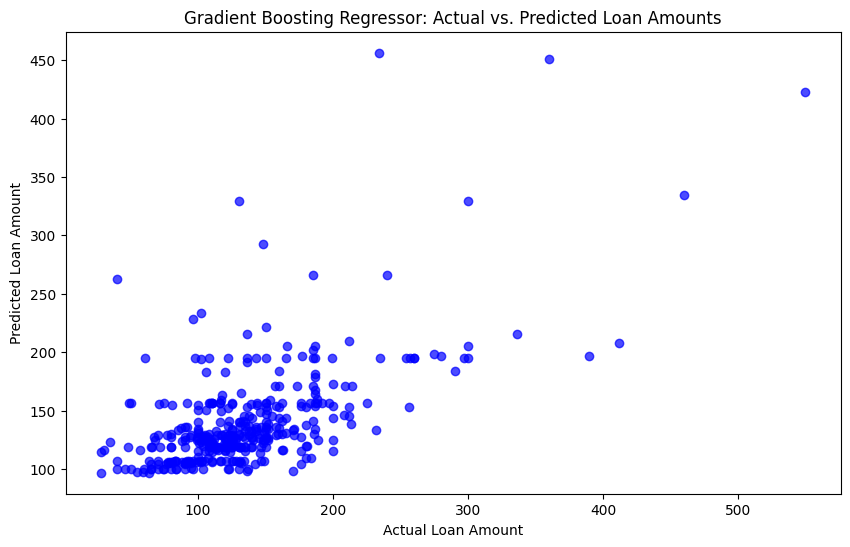

In [ ]:
import matplotlib.pyplot as plt

# Visualization of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.7)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted Loan Amounts")
plt.show()


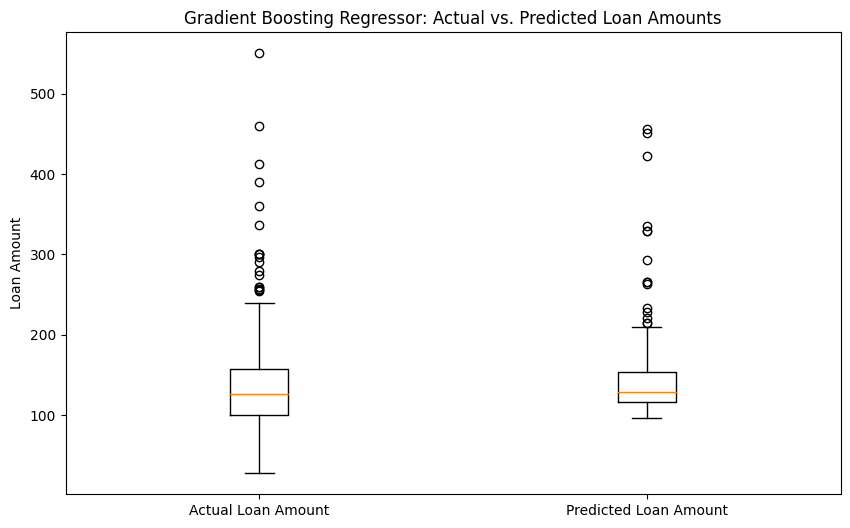

In [ ]:
import matplotlib.pyplot as plt

# Visualization of predicted vs. actual values using a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([y_test, y_pred_gbr], labels=['Actual Loan Amount', 'Predicted Loan Amount'])
plt.ylabel("Loan Amount")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted Loan Amounts")
plt.show()


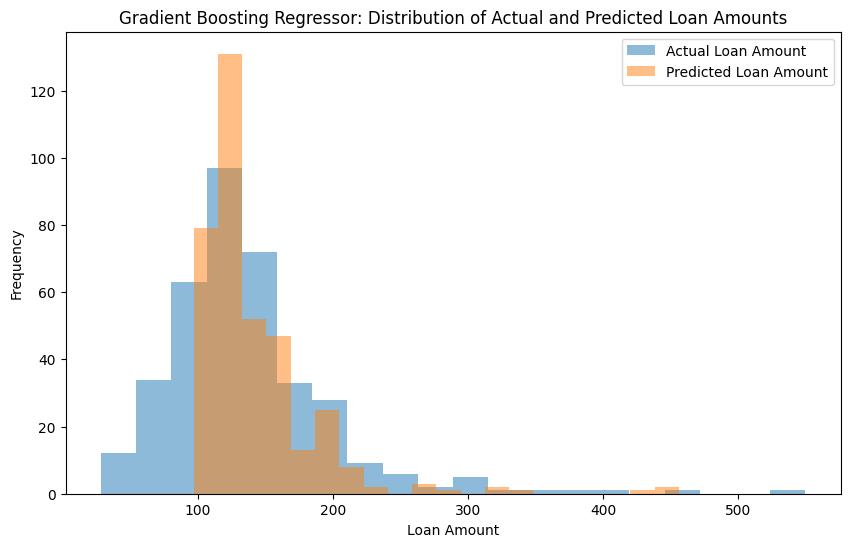

In [ ]:
import matplotlib.pyplot as plt

# Visualization of predicted vs. actual values using histograms
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Loan Amount')
plt.hist(y_pred_gbr, bins=20, alpha=0.5, label='Predicted Loan Amount')
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.legend()
plt.title("Gradient Boosting Regressor: Distribution of Actual and Predicted Loan Amounts")
plt.show()


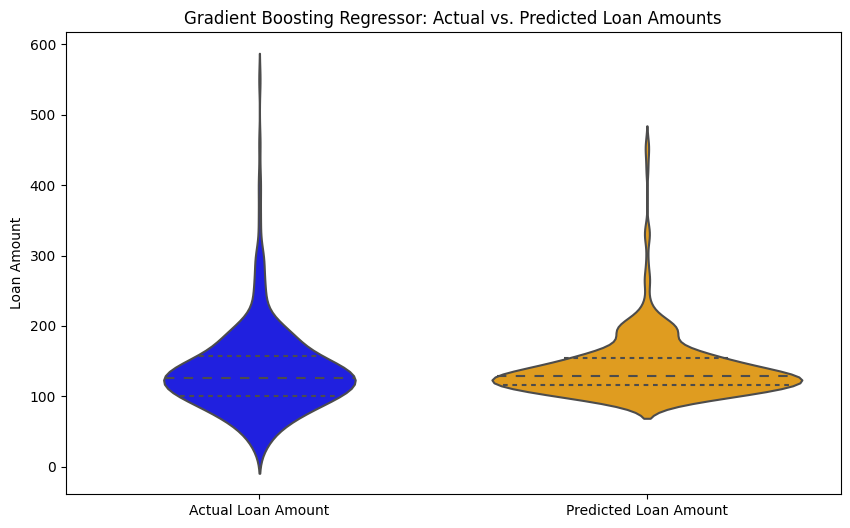

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of predicted vs. actual values using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=[y_test, y_pred_gbr], inner="quartiles", palette=["blue", "orange"])
plt.xticks([0, 1], ['Actual Loan Amount', 'Predicted Loan Amount'])
plt.ylabel("Loan Amount")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted Loan Amounts")
plt.show()


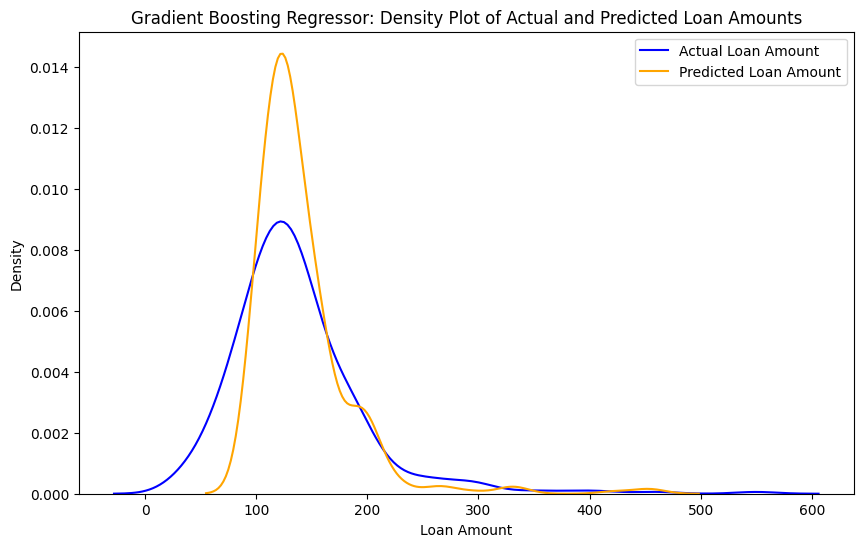

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of predicted vs. actual values using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Loan Amount', color='blue')
sns.kdeplot(y_pred_gbr, label='Predicted Loan Amount', color='orange')
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.legend()
plt.title("Gradient Boosting Regressor: Density Plot of Actual and Predicted Loan Amounts")
plt.show()
